# Titanic Survival Kaggle Dataset

## 1. Data Reading

Import necessary libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To load both datasets, train and test. Also I will join them to be able to study and work with missing values better.

In [59]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
idx_train = df_train['PassengerId']
idx_test = df_test['PassengerId']
df_all = pd.concat([df_train, df_test],
                  axis = 0, sort = False)
df_all.set_index('PassengerId',
                drop = True,
                inplace = True)
df_all.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [63]:
df_all.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


We check now each column data type and the amount of NaN values.

In [64]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


We can see that the next variables have NaN that we will need to solve:
- Age = 263 NaN values.
- Fare = 1 NaN value.
- Cabin = 1014 NaN values.
- Embarked = 2 NaN values.

Now we should identify and describe each feature:

- Categorical features:
    - Pclass: Ordinal feature that shows the class of the ticket. 1: 1st Class, 2: 2nd Class, 3: 3rd Class
    - Sex: Categorical feature that identifies the genre.
    - Embarked: Categorical feature that identifies the port in which the passenger embarked.
    - Survived: Categorical feature that shows whether the passenger survived or not.

- Numerical features:
    - Age: Continuous numerical feature of the age of the passenger.
    - Fare: Continuous numerical feature of the cost of the ticket.
    - SibSp: Discrete numerical feature showing the amount of siblings and spouse in the boat.
    - Parch: Discrete numerical feature showing the amount of parents and children in the boat.

- Other features:
    - Name: Name of the passenger, we will use this feature to derive others more useful.
    - Ticket: Ticket number of the passenger, we might use this feature to derive passengers that bought the ticket together.

In [65]:
df_all.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


With just the initial information we can extract some insights:

- The target feature is not completely balance, there are more people that died than that survived (38.3% - 61.7%)
- More than half of the people were traveling in 3rd class and less than 25% were 1st class.
- There were more male passengers that females (64.4% - 35.6%)
- Most of the ticket fares were between 7 and 31 but there were some free ones and some very expensive.
- Most of the people embarked at S.

## 2. Data Cleaning

### 2.1. Columns Preparation

#### 2.1.1. Sex

We map the sex column to be numerical, so we can use it for NaN filling. Male: 0, Female: 1.

In [66]:
sex_dict = {'male': 0, 'female': 1}
df_all['Sex'] = df_all['Sex'].map(sex_dict)

#### 2.1.2. Embarked

We can perform the same action to embarked.

In [67]:
embarked_dict = {'S': 0, 'C': 1, 'Q': 2}
df_all['Embarked'] = df_all['Embarked'].map(embarked_dict)

In [68]:
df_all

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1.0
1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0


#### 2.1.3. Fare

We can also take advantage of Fare if we bine the feature converting it to discrete instead of continuous. But first we have to solve the missing value, and as it is just one, we can use the median aggregated by Pclass to fill it.

In [78]:
df_all['Fare'].fillna(df_all.groupby('Pclass')['Fare'].transform('median'),
                     inplace = True)
df_all['Fare'] = pd.cut(df_all['Fare'],
                       5,
                       labels = [0,1,2,3,4])

In [87]:
df_all['Fare'] = df_all['Fare'].astype('int64')

#### 2.1.4. Age

To substitute Age NaNs we can find some correlation with other features and then use the aggregated medians to fill them.

In [88]:
df_age_corr = df_all.drop(['Name', 'Ticket','Cabin'],
                         axis = 1)

In [89]:
df_age_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   int64  
 7   Embarked  1307 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 92.0 KB


<AxesSubplot:>

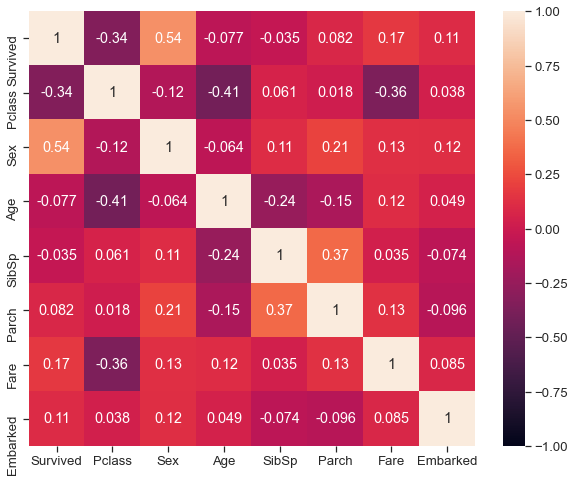

In [90]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

sns.heatmap(df_age_corr.corr(),
           vmin = -1,
           vmax = 1,
           annot = True)

The highest correlation with age are Pclass, SibSp, Parch and Fare, so we can use them to aggregate the ages and take the means to substitute the NaN values.

In [95]:
pd.set_option('display.max_rows', 500)
df_age_corr.groupby(['Pclass','SibSp','Parch','Fare'])['Age'].median()

Pclass  SibSp  Parch  Fare
1       0      0      0       41.50
                      1       35.00
                      2       36.00
                      4       35.00
               1      0       30.00
                      1       48.00
                      2       33.50
                      4       47.00
               2      0       20.50
                      1       24.00
                      2       27.00
        1      0      0       38.00
                      1       27.00
                      2       55.00
               1      0       52.00
                      1       45.00
                      2       50.00
               2      0       27.00
                      1       19.50
               3      2       54.50
               4      2       62.00
        2      0      0       54.00
                      1       50.00
               2      2       18.00
        3      2      2       23.50
2       0      0      0       30.00
               1      0       26.50
 